In [1]:
#implementace knihoven.Knihovny sta?eny pomoc? karty packages/install (PACKAGES V PRAVO DOLE)
# vlo?en? knihoven ####
library(readxl)  
library(dplyr)
library(openxlsx)
library(moments)
library(lawstat)
library(BSDA)

getwd() # vyp??e aktu?ln? pou??vanou slo?ku do konzole 
#setwd("~/?koln?/MAT/DU_S1")  # nastaven? pracovn?ho adres??e nesm? se v n?zvech obj?vit ?esk? znaky
#lze tak? p?es kartu Session/Set working directory/chose directory

# vlastn? funkce ####


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: lattice


Attaching package: ‘BSDA’


The following object is masked from ‘package:datasets’:

    Orange




[1] "/home/ber0061/Repositories/PS_2021/tmp"

In [2]:
analiza <- function(value) # vytvo?en? funkce pro zpracov?n? z?kladn?ch informac? o nasb?ran?ch datech
{
  # nazev         datov? typ    funkce
  #
  # value                       hodnoty pro zanalizov?n?
  # analizestruc  dataframe     zanalizovan? hodnoty min max ...
  
  analizestruc = data.frame(1) # vytvo?en? struktury, do kter? budu ukl?dat informace o anal?ze dat
  
  analizestruc$rozsahSouboru  = length(value)
  analizestruc$minimum = min(value)
  analizestruc$dolni_kvartil = quantile(value,0.25,TRUE)
  analizestruc$median = median(value)
  analizestruc$prumer = mean(value)
  analizestruc$horni_kvartil = quantile(value,0.75,TRUE)
  analizestruc$maximum = max(value)
  analizestruc$smerodatna_odchylka = sd(value)
  analizestruc$variacni_koeficient = (100*(analizestruc$smerodatna_odchylka/analizestruc$prumer))
  analizestruc$sikmost = (moments::skewness(value,na.rm=T))
  analizestruc$spicatost = (moments::kurtosis(value,na.rm=T)-3)
  analizestruc$mezikvartiloveRozpeti = analizestruc$horni_kvartil - analizestruc$dolni_kvartil
  analizestruc$dolni_mez = analizestruc$dolni_kvartil - 1.5*analizestruc$mezikvartiloveRozpeti
  analizestruc$horni_mez = analizestruc$horni_kvartil + 1.5*analizestruc$mezikvartiloveRozpeti
  
  analizestruc = analizestruc[,-1] #odstran? prvn? sloupec kter? je nepot?ebn? vzdikl p?i tvorb? struktury
  # pot?eba zm?nit a? na to n?kdy p??jdu (nen? vhodn? vytvo?it sloupec a pak ho mazat sta?? vytvo?it ??dek)
  return(analizestruc) #vr?t? strukturu s informacemi kter? vypo??t?
}

In [3]:
cat("\014")    # vy?ist? konzoli

In [4]:
# z?sk?n? dat a zobrazen? prvn?ch n?kolik ??dk? ####
data = read_excel("ukol_52.xlsx","Vysledky mereni") 
#data = data[,-1] #odstran? prvn? sloupec (ID nen? pot?eba pro tento ?kol)
colnames(data)=c("ID", "22","5","22","5","22","5","22","5")  #p?ejmenov?n? jednotliv?ch sloupc?
#head(data,8L) #vyp??e 8 ??dk? z pole data

New names:
* `` -> ...1



In [5]:
# v?b?r dat ####


#varianta 1 s odstra??n?mi hosnotami NA te? neaktivn?
A = na.omit(data[,(2:3)])
B = na.omit(data[,(4:5)])
C = na.omit(data[,(6:7)])
D = na.omit(data[,(8:9)])

#varianta 2 s odstra??n?mi hosnotami NA
A = data[,(2:3)]
B = data[,(4:5)]
C = data[,(6:7)]
D = data[,(8:9)]

# vytvo?en? listu pro uchov?n? a rozt??d?n? dat p?i pr?ci ####
# umo??uje zkr?tit program o akce, kter? se periodicky opakuj?. 
# List v tomto p??pad? zastupuje strukturu, kter? v jazyce R nen?

data = list(NA,NA,NA,NA) #A,B,C,D
names(data) <- c('A','B','C','D')
data[['A']] <- list('s_NA' = A)
data[['B']] <- list('s_NA' = B)
data[['C']] <- list('s_NA' = C)
data[['D']] <- list('s_NA' = D)

In [6]:
# zpracov?n? dat ####

for(i in seq_along(data))
{
  #odstranÄ›nĂ­ pĹ™ebyteÄŤnĂ˝ch hodnot NA
  data[[i]][['puvodni']] = na.omit(data[[i]][['s_NA']])
  
  # vĂ˝poÄŤet rozdĂ­lu mezi teplotou 22 a 5
  data[[i]][['s_NA']]['rozdil'] = data[[i]][['s_NA']]['22']-data[[i]][['s_NA']]['5']
  data[[i]][['puvodni']]['rozdil'] = data[[i]][['puvodni']]['22']-data[[i]][['puvodni']]['5']
  
  
  for (j in seq_along(data[[i]][['puvodni']]))
  {
    # z?sk?n? podrobnosti o datech (jejich maxima minima stĹ™ednĂ­ hodnoty...)
    data[[i]][['analiza']][[j]] = data.frame(analiza(data[[i]][['puvodni']][[j]]))  # funkce z ukolu_1
    
    # zaokrouhlenĂ­
    data[[i]][['analiza']][[j]][,1:12] = round(data[[i]][['analiza']][[j]][,1:12],1)
    data[[i]][['analiza']][[j]][,13:14] = round(data[[i]][['analiza']][[j]][,13:14],2)
    
    #odstranÄ›nĂ­ odlehlĂ˝ch pozorovĂˇnĂ­
    data[[i]][['bez_OP']][[j]] = data.frame(data[[i]][['puvodni']][[j]])
    
    data[[i]][['bez_OP']][[j]] [ data[[i]][['puvodni']][j] > data[[i]][['analiza']][[j]]$horni_mez | data[[i]][['puvodni']][j] < data[[i]][['analiza']][[j]]$dolni_mez] = NA
    data[[i]][['bez_OP']][[j]] = na.omit(data[[i]][['bez_OP']][[j]])
  }
}

In [7]:
# pĹ™ejmenovĂˇnĂ­ kvĹŻli pĹ™ehlednosti ####
for(i in seq_along(data))
{
  names(data[[i]][['analiza']]) <- c('22', '5','rozdil')
  names(data[[i]][['bez_OP']]) <- c('22', '5','rozdil')
}

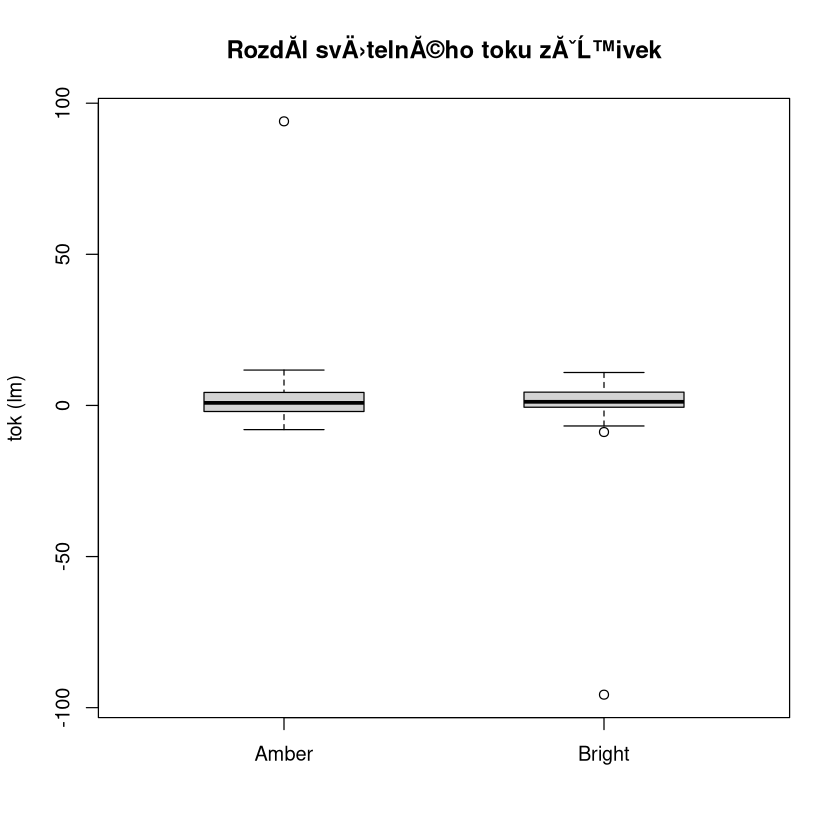

In [8]:
# zobrazenĂ­ ####
# KrabicovĂ˝
boxplot(data.frame(data[['A']][['s_NA']]['rozdil'])[,1],data.frame(data[['B']][['s_NA']]['rozdil'])[,1],
        main = "RozdĂ­l svÄ›telnĂ©ho toku zĂˇĹ™ivek",
        names=c("Amber","Bright"),
        ylab = "tok (lm)",
        boxwex = 0.5)

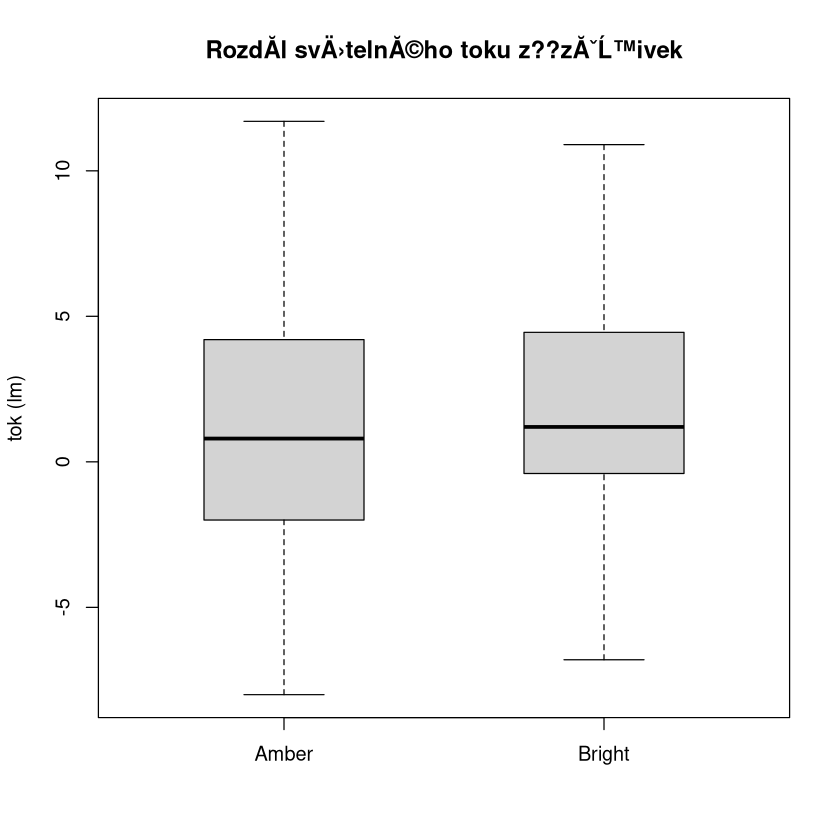

In [9]:
boxplot(data.frame(data[['A']][['bez_OP']]['rozdil'])[,1],data.frame(data[['B']][['bez_OP']]['rozdil'])[,1],
        main = "RozdĂ­l svÄ›telnĂ©ho toku z??zĂˇĹ™ivek",
        names=c("Amber","Bright"),
        ylab = "tok (lm)",
        boxwex = 0.5)

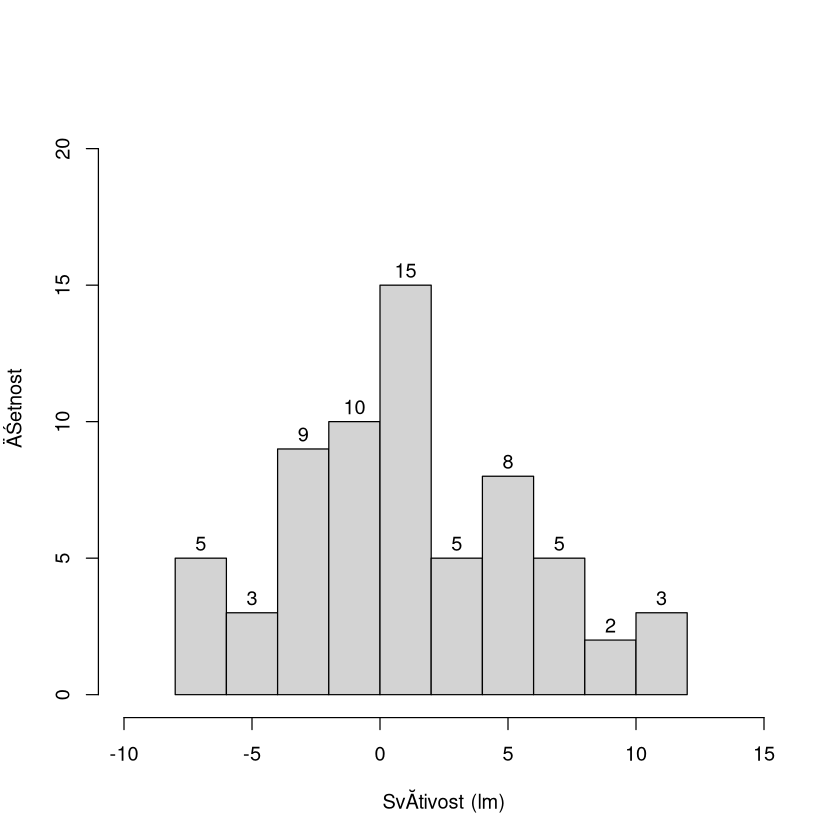

In [10]:
# Histogram
hist(data.frame(data[['A']][['bez_OP']]['rozdil'])[,1],
     main = " ",
     xlab = "SvĂ­tivost (lm)",
     xlim = c(-10,15),
     ylab = "ÄŚetnost",
     ylim = c(0,21),
     border =  "black",
     col = "lightgrey",
     labels = TRUE)

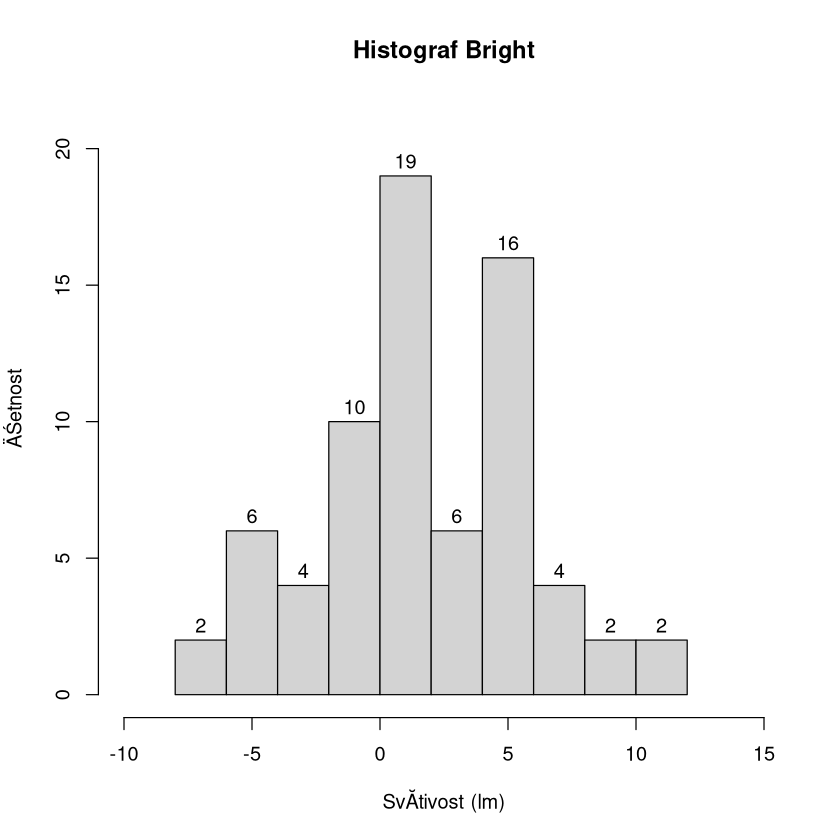

In [11]:
hist(data.frame(data[['B']][['bez_OP']]['rozdil'])[,1],
     main = "Histograf Bright",
     xlab = "SvĂ­tivost (lm)",
     xlim = c(-10,15),
     ylab = "ÄŚetnost",
     ylim = c(0,21),
     border = "black",
     col = "lightgrey",
     labels = TRUE)

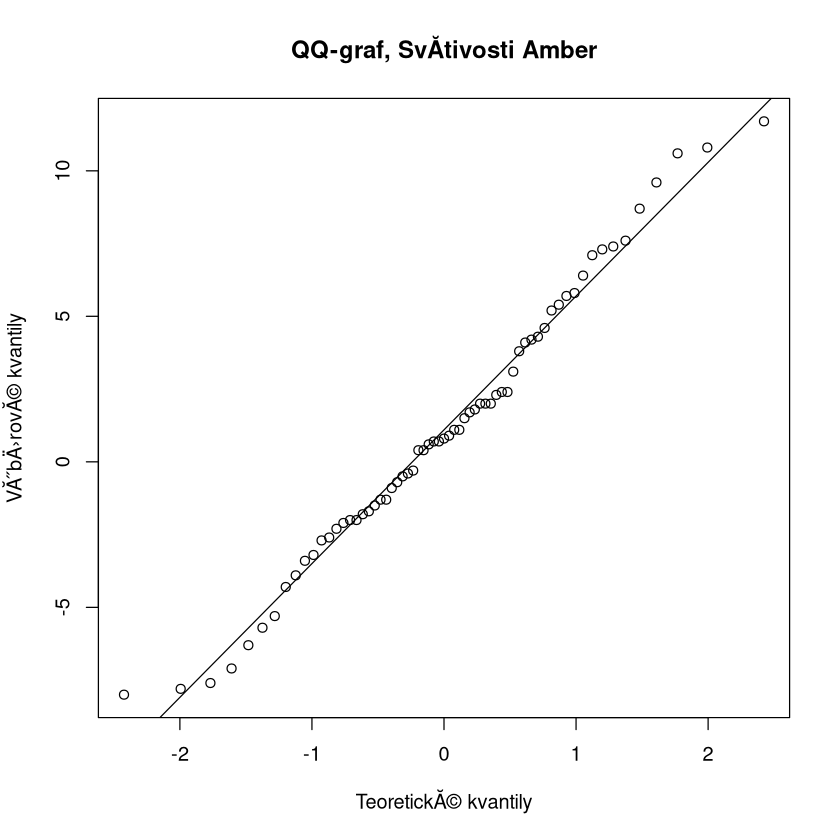

In [12]:
# Q-Q graf 
qqnorm(data.frame(data[['A']][['bez_OP']]['rozdil'])[,1],
       xlab="TeoretickĂ© kvantily",
       ylab="VĂ˝bÄ›rovĂ© kvantily",
       main="QQ-graf, SvĂ­tivosti Amber",
       col = "black")
qqline(data.frame(data[['A']][['bez_OP']]['rozdil'])[,1])

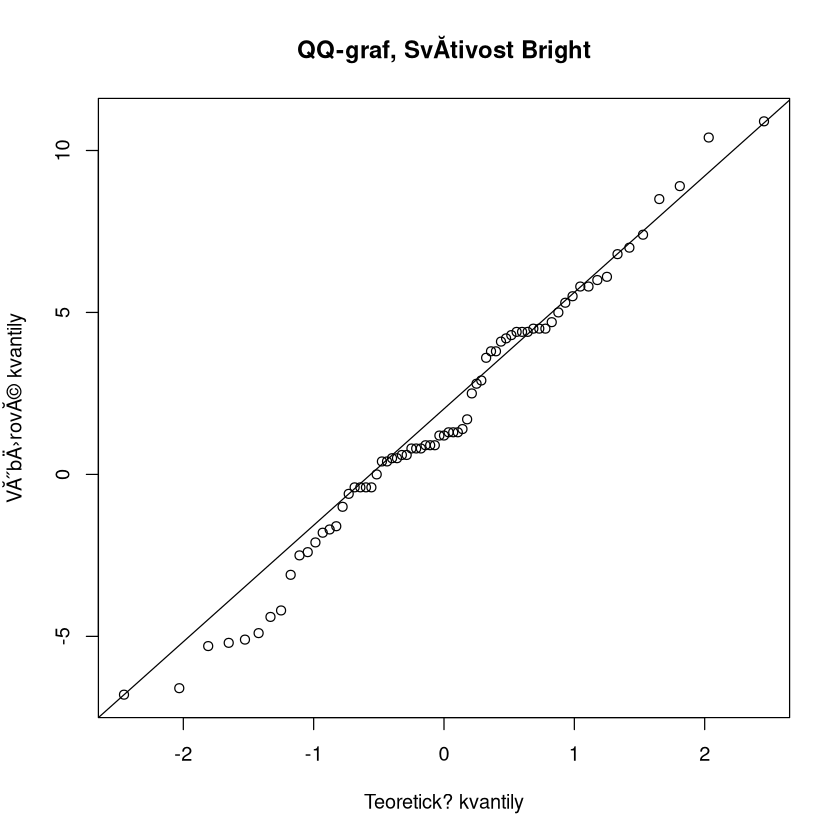

In [13]:
qqnorm(data.frame(data[['B']][['bez_OP']]['rozdil'])[,1], 
       xlab="Teoretick? kvantily",
       ylab="VĂ˝bÄ›rovĂ© kvantily",
       main="QQ-graf, SvĂ­tivost Bright",
       col = "black")
qqline(data.frame(data[['B']][['bez_OP']]['rozdil'])[,1])

In [38]:
# testy ####
for (i in seq_along(data)) 
{
  print(i)
  # Shapir?v-Wilk?v test (p-hodnota) ####
  data[i][['test']][['shapiro']] = shapiro.test(data[[i]][['bez_OP']][['rozdil']][,1])
  # Test symetrie (Wilcoxon?v levostrann? test (p-hodnota))####
  data[[i]][['test']][['symetrie']] = symmetry.test(data.frame(data[[i]][['bez_OP']]['rozdil'])[,1],boot=FALSE)
  # BodovĂ˝ odhad = prĹŻmÄ›r
  # 95% levostrannĂ˝ intervalovĂ˝ odhad ####
  data[[i]][['test']][['95%_levostrany']] = t.test(data.frame(data[[i]][['bez_OP']]['rozdil'])[,1], alternative = 'greater', conf.level = 0.95)
  # Wilcoxon?v test median
  data[[i]][['test']][['wilcox_med']] = wilcox.test(data.frame(data[[i]][['bez_OP']]['rozdil'])[,1], mu = data.frame(data[[i]][['analiza']][['rozdil']]['median'])[,1], alternative = 'greater')
}

[1] 1


Warning message in data[i] <- `*vtmp*`:
“number of items to replace is not a multiple of replacement length”


[1] 2


Warning message in data[i] <- `*vtmp*`:
“number of items to replace is not a multiple of replacement length”


[1] 3


Warning message in data[i] <- `*vtmp*`:
“number of items to replace is not a multiple of replacement length”


[1] 4


Warning message in data[i] <- `*vtmp*`:
“number of items to replace is not a multiple of replacement length”


In [40]:
data[[1]][['bez_OP']][['rozdil']]

,data..i.....puvodni.....j..
,<dbl>
1,-0.7
2,6.4
3,11.7
4,-6.3
5,-2.1
6,1.7
7,-2.0
8,-0.3
9,-8.0


In [ ]:
#manuv-Witneuv
spoj = list()
spoj[['bodovy_odhad']] = data.frame(data[['A']][['analiza']][['rozdil']]['median'])[,1] - data.frame(data[['B']][['analiza']][['rozdil']]['median'])[,1]
# srovnani nedianu poklesu
spoj[['levostrany_IO']] = t.test(x = data.frame(data[['A']][['bez_OP']]['rozdil'])[,1],y = data.frame(data[['B']][['bez_OP']]['rozdil'])[,1], mu = spoj[['bodovy_odhad']],alternative = 'greater', var.equal = TRUE, conf.level = 0.95)
# wilcoxsn?v test
spoj[['mann_whith_levostranne']] = wilcox.test(x = data.frame(data[['A']][['bez_OP']]['rozdil'])[,1],y = data.frame(data[['B']][['bez_OP']]['rozdil'])[,1], mu = spoj[['bodovy_odhad']],alternative = 'greater', conf.level = 0.95,conf.int = TRUE)


# pozn?mky k lu?t?n?
#pokud je ?ikmost a ?pi?atost o dva od -2 do 2 potom odpov?d? nom?mu rozd?len?(qqgraf)
#toto je explora?n? odhad a je pot?eba ov??it shapir?v wilkov?m testem 
#pokud v?jde p hodnota v?jde v?ce ne? zvolen? hladina v?znamnosti (tady 0.05 proto?e zad?n?) pak nezam?t?me
#zam?tnout nebo nezam?tnout mu?eme pouze nulovou hypot?zu Ha (-H0) s t?m nem? co d?lat

#explora?n? pomoc? tvaru histogramu a exaktn? pomoc? testu symetrie


#pokud je p hodnota z 